<a href="https://colab.research.google.com/github/febigandap/TugasIndividu_TrainDataset/blob/master/EDA_%22train%22_FEBI_GANDA_PUTRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PERTANYAAN YANG AKAN DI JAWAB PADA PROSES INI ADALAH :**

Menghitung jumlah penumpang kereta pada masing-masing “class” dengan parameter “gender”, dan “satisfaction” penumpang.

**1. INSTALASI SPARK PADA GOOGLE COLAB**

In [50]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://www-eu.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install -q findspark

In [65]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

**2. IMPORT LIBRARY SPARK YANG SUDAH DIINSTALL**

In [66]:
import findspark
findspark.init("spark-2.4.5-bin-hadoop2.7")# SPARK_HOME
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
from pyspark.sql.functions import col, avg

In [57]:
!pip install -q pyspark_dist_explore

In [68]:
import matplotlib.pyplot as plt
from pyspark_dist_explore import Histogram, hist


**3. INISIALISASI SPARK CONTEXT DAN SPARK SESSION**

In [69]:
sc = spark.sparkContext
spark = SparkSession(sc)

**4. LOAD DATASET**

In [70]:
train_df = spark.read.csv("Train.csv", header=True, inferSchema=True)
train_df.printSchema()            #mengecek schema dari dataset

root
 |-- _c0: integer (nullable = true)
 |-- id: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Customer Type: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Type of Travel: string (nullable = true)
 |-- Class: string (nullable = true)
 |-- Flight Distance: integer (nullable = true)
 |-- Inflight wifi service: integer (nullable = true)
 |-- Departure/Arrival time convenient: integer (nullable = true)
 |-- Ease of Online booking: integer (nullable = true)
 |-- Gate location: integer (nullable = true)
 |-- Food and drink: integer (nullable = true)
 |-- Online boarding: integer (nullable = true)
 |-- Seat comfort: integer (nullable = true)
 |-- Inflight entertainment: integer (nullable = true)
 |-- On-board service: integer (nullable = true)
 |-- Leg room service: integer (nullable = true)
 |-- Baggage handling: integer (nullable = true)
 |-- Checkin service: integer (nullable = true)
 |-- Inflight service: integer (nullable = true)
 |-- Cleanline

**5. PROSES EDA**

In [71]:
print("Jumlah total penumpang kereta:")
train_df.count()

Jumlah total penumpang kereta:


103904

In [72]:
print("Jumlah penumpang pada masing-masing Class Kereta : ")
train_df.groupby("class").count().show()

Jumlah penumpang pada masing-masing Class Kereta : 
+--------+-----+
|   class|count|
+--------+-----+
|Eco Plus| 7494|
|Business|49665|
|     Eco|46745|
+--------+-----+



In [78]:
print("Jumlah penumpang pada masing-masing gender : ")
train_df.groupby("gender").count().show()

Jumlah penumpang pada masing-masing gender : 
+------+-----+
|gender|count|
+------+-----+
|Female|52727|
|  Male|51177|
+------+-----+



In [88]:
print("Jumlah Gate Location : ")
train_df.groupby("Gate Location").count().show()

Jumlah Gate Location : 
+-------------+-----+
|Gate Location|count|
+-------------+-----+
|            1|17562|
|            3|28577|
|            5|13879|
|            4|24426|
|            2|19459|
|            0|    1|
+-------------+-----+



In [73]:
train_df.select('Age').describe().show()

+-------+------------------+
|summary|               Age|
+-------+------------------+
|  count|            103904|
|   mean|39.379706267323684|
| stddev|15.114963699737805|
|    min|                 7|
|    max|                85|
+-------+------------------+



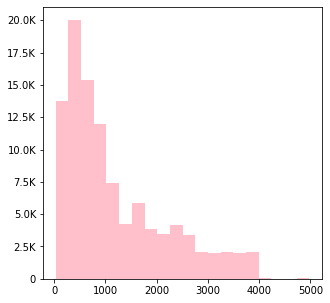

In [80]:
train_df_flight_distance = train_df.select('Flight Distance')
fig, axes = plt.subplots()
fig.set_size_inches(5, 5)
hist(axes, train_df_flight_distance, bins=20, color="pink")
plt.show()

In [82]:
print("Jumlah total penumpang dengan kolom Flight Distance kosong(null):")
train_df.where(col("Flight Distance").isNull()).count()

Jumlah total penumpang dengan kolom Flight Distance kosong(null):


0

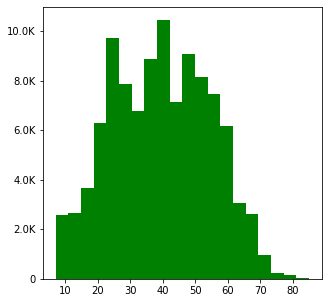

In [75]:
train_df_age = train_df.select('Age')
fig, axes = plt.subplots()
fig.set_size_inches(5, 5)
hist(axes, train_df_age, bins=20, color="green")
plt.show()

In [84]:
print("Jumlah total penumpang dengan kolom Age kosong(null):")
train_df.where(col("Age").isNull()).count()

Jumlah total penumpang dengan kolom Age kosong(null):


0

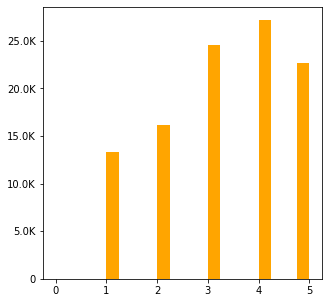

In [81]:
train_df_cleanliness = train_df.select('Cleanliness')
fig, axes = plt.subplots()
fig.set_size_inches(5, 5)
hist(axes, train_df_cleanliness, bins=20, color="orange")
plt.show()

In [83]:
print("Jumlah total penumpang dengan kolom cleanliness kosong(null):")
train_df.where(col("Cleanliness").isNull()).count()

Jumlah total penumpang dengan kolom cleanliness kosong(null):


0

**6. PRE - PROCESSING DATA**

In [77]:
mean_age = train_df.agg(avg(col("Age"))).first()
print("rata-rata umur penumpang", mean_age[0])
train_df = train_df.na.fill(mean_age[0], ["Age"])

rata-rata umur penumpang 39.379706267323684


In [86]:
mean_fd = train_df.agg(avg(col("Flight Distance"))).first()
print("rata-rata jarak terbang", mean_fd[0])
train_df = train_df.na.fill(mean_fd[0], ["Flight Distance"])

rata-rata jarak terbang 1189.4483754234677


In [89]:
mean_fd = train_df.agg(avg(col("Cleanliness"))).first()
print("rata-rata Cleanliness", mean_fd[0])
train_df = train_df.na.fill(mean_fd[0], ["Cleanliness"])

rata-rata Cleanliness 3.2863508623344626


In [90]:
print("Jumlah total penumpang dengan kolom Age kosong(null):")
train_df.where(col("Age").isNull()).count()

Jumlah total penumpang dengan kolom Age kosong(null):


0

In [ ]:
train_df.select('Age').describe().show()

+-------+------------------+
|summary|               Age|
+-------+------------------+
|  count|            103904|
|   mean|39.379706267323684|
| stddev|15.114963699737805|
|    min|                 7|
|    max|                85|
+-------+------------------+



In [92]:
train_df.coalesce(1).write.csv("train2_processed", header=True)

In [93]:
spark.stop()    #digunakan untuk menghentikan SparkSession